In [250]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [277]:
weight_path = 'CRIX_weights/'
weights = [l for l in os.listdir(weight_path) if l.endswith('.csv')]

N_coin = 5 # Number of coins consider

In [296]:
stable_coins = ['usdc', 'usdt', 'vee']

In [297]:
trimmed_weight_arr = []
df = pd.DataFrame()

for w in weights:
    weight = pd.read_csv(weight_path+w)
    weight.sort_values('weight', ascending=False, inplace=True)
    weight.reset_index(drop=True, inplace=True)
    
    # remove stable coins
    for sc in stable_coins:
        weight = weight.loc[weight.coin != sc,:]
    
    trimmed_weight = weight.iloc[:N_coin,:]
    sum_weight = trimmed_weight.weight.sum()
    
    # Normalization
    trimmed_weight.weight = trimmed_weight.weight/sum_weight
    coins = trimmed_weight.coin
    
    trimmed_weight = trimmed_weight.T.iloc[1:,:]
    trimmed_weight.columns = coins
    
    date = pd.to_datetime(w[w.find('_',9)+1:].replace('.csv',''))
    
    trimmed_weight.index = [date]
    trimmed_weight = trimmed_weight.astype(np.float)
    df = df.append(trimmed_weight)

    trimmed_weight_arr.append(trimmed_weight)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [280]:
df.sort_index(inplace=True)

AttributeError: 'DataFrame' object has no attribute 'usdt'

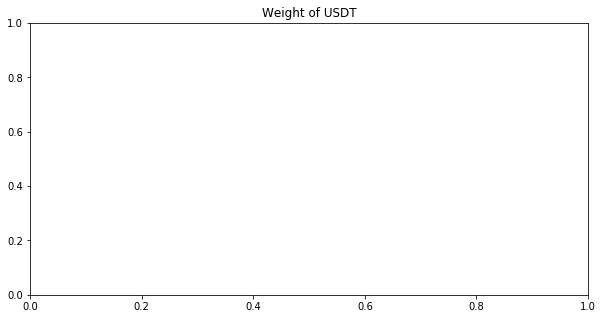

In [273]:
plt.figure(figsize=(10,5))
plt.title('Weight of USDT')
plt.plot(df.usdt)
plt.savefig('USDT_weight.png')

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Weight of USDC')
plt.plot(df.usdc)
plt.savefig('USDC_weight.png')

In [298]:
df.sort_index(inplace=True)

<Figure size 720x360 with 0 Axes>

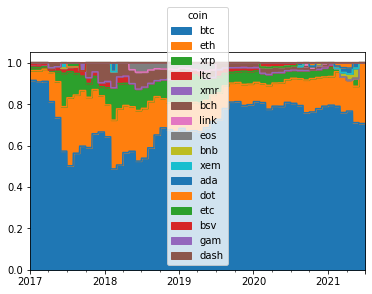

In [299]:
plt.figure(figsize=(10,5))
df.plot.area()


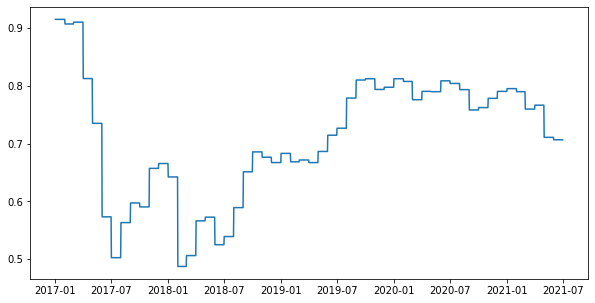

In [300]:
plt.figure(figsize=(10,5))
plt.plot(df.btc)

In [301]:
np.argmin(df.btc)

396

In [302]:
df.iloc[396,:]

coin
btc     0.487269
eth     0.235606
xrp     0.155906
ltc          NaN
xmr          NaN
bch     0.078242
link         NaN
eos          NaN
bnb          NaN
xem          NaN
ada     0.042976
dot          NaN
etc          NaN
bsv          NaN
gam          NaN
dash         NaN
Name: 2018-02-01 00:00:00, dtype: float64

In [321]:
_id = (df.index>='20180301') 
df.loc[_id,:]

coin,btc,eth,xrp,ltc,xmr,bch,link,eos,bnb,xem,ada,dot,etc,bsv,gam,dash
2018-03-01,0.506072,0.271059,0.12213,0.03222,NaN,0.068519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-02,0.506072,0.271059,0.12213,0.03222,NaN,0.068519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-03,0.506072,0.271059,0.12213,0.03222,NaN,0.068519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-04,0.506072,0.271059,0.12213,0.03222,NaN,0.068519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,0.506072,0.271059,0.12213,0.03222,NaN,0.068519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-26,0.706534,0.293466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-27,0.706534,0.293466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-28,0.706534,0.293466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-29,0.706534,0.293466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [329]:
l = np.unique(df.drop('gam', axis=1 ).T.index)
# gam is problematic

for name in l:
    print(name)

ada
bch
bnb
bsv
btc
dash
dot
eos
etc
eth
link
ltc
xem
xmr
xrp


In [330]:
df = df.drop('gam', axis=1 )

In [331]:
df.to_csv('CRIX_weights.csv')

In [306]:
'xem', 'gam', 'dash', 'etc', 'xmr'

16

In [317]:
np.sum(df.loc[df.index.year > 2017,:].xmr)

0.0

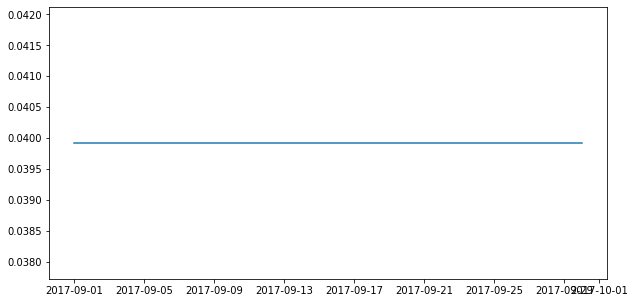

In [323]:
plt.figure(figsize=(10,5))
plt.plot(df.loc[:,'gam'])

In [ ]:
#missing: bnb, dot, eos, eth, link, ltc, xrp

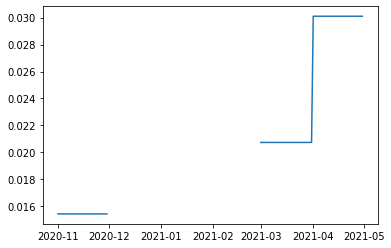

In [249]:
plt.plot(df.loc[:, 'bnb'])